<a href="https://colab.research.google.com/github/hanarohadah/analisis-education_inequality_data/blob/main/analisis_education_inequality_data_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving education_inequality_data.csv to education_inequality_data.csv


In [5]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['education_inequality_data.csv']))

# Tampilkan 5 baris pertama untuk memastikan berhasil
print(df.head())


   id             school_name     state school_type grade_level  \
0   1      Bowman High School  Michigan     Private        High   
1   2      Foster High School  Michigan     Charter      Middle   
2   3      Henson High School  New York      Public      Middle   
3   4      Weaver High School     Texas     Private  Elementary   
4   5  King Elementary School  Michigan      Public  Elementary   

   funding_per_student_usd  avg_test_score_percent  student_teacher_ratio  \
0                  9575.80                    65.9                   17.5   
1                 16733.10                    87.3                   24.2   
2                 24890.74                    72.8                   27.0   
3                  6857.49                    81.5                   26.2   
4                 16910.73                    44.7                   20.2   

   percent_low_income  percent_minority  internet_access_percent  \
0                30.0              44.0                     74.1  

In [6]:
# Cek header kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   school_name              1000 non-null   object 
 2   state                    1000 non-null   object 
 3   school_type              1000 non-null   object 
 4   grade_level              1000 non-null   object 
 5   funding_per_student_usd  1000 non-null   float64
 6   avg_test_score_percent   1000 non-null   float64
 7   student_teacher_ratio    1000 non-null   float64
 8   percent_low_income       1000 non-null   float64
 9   percent_minority         1000 non-null   float64
 10  internet_access_percent  1000 non-null   float64
 11  dropout_rate_percent     1000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 93.9+ KB


In [7]:
# Menghitung jumlah missing values per kolom
df.isnull().sum()

,0
id,0
school_name,0
state,0
school_type,0
grade_level,0
funding_per_student_usd,0
avg_test_score_percent,0
student_teacher_ratio,0
percent_low_income,0
percent_minority,0


In [8]:
# Menghitung rata-rata pendanaan per siswa
rata_rata_pendanaan = df['funding_per_student_usd'].mean()
print(f"Rata-rata pendanaan per siswa adalah:${rata_rata_pendanaan}")

Rata-rata pendanaan per siswa adalah:$15154.160179999999


In [10]:
# Perbandingan Rata-rata Nilai Ujian Berdasarkan Tipe Sekolah
rata_rata_nilai_per_tipe_sekolah = df.groupby('school_type')['avg_test_score_percent'].mean()
print (rata_rata_nilai_per_tipe_sekolah)

school_type
Charter    69.069632
Private    70.505634
Public     70.391223
Name: avg_test_score_percent, dtype: float64


In [13]:
# Sekolah dengan Tingkat Putus Sekolah Tertinggi dan Terendah
sekolah_dropout_tertinggi = df.sort_values(by='dropout_rate_percent', ascending=False).head(5)
sekolah_dropout_terendah = df.sort_values(by='dropout_rate_percent').head(5)

print("Sekolah dengan Tingkat Putus Sekolah Tertinggi:")
print(sekolah_dropout_tertinggi[['school_name','state','dropout_rate_percent']])

print("\nSekolah dengan Tingkat Putus Sekolah Terendah:")
print(sekolah_dropout_terendah[['school_name','state','dropout_rate_percent']])

Sekolah dengan Tingkat Putus Sekolah Tertinggi:
                   school_name       state  dropout_rate_percent
953  Fleming Elementary School       Texas                 14.99
248    Price Elementary School       Texas                 14.99
929          Fox Middle School  California                 14.96
62      Schwartz Middle School    Illinois                 14.95
740     Mack Elementary School    Michigan                 14.94

Sekolah dengan Tingkat Putus Sekolah Terendah:
                  school_name           state  dropout_rate_percent
937       Barnett High School         Florida                  0.50
45    Stevenson Middle School      California                  0.54
613       Brown Middle School  North Carolina                  0.56
415   Huynh Elementary School        New York                  0.56
363  Martin Elementary School    Pennsylvania                  0.58


<function matplotlib.pyplot.show(close=None, block=None)>

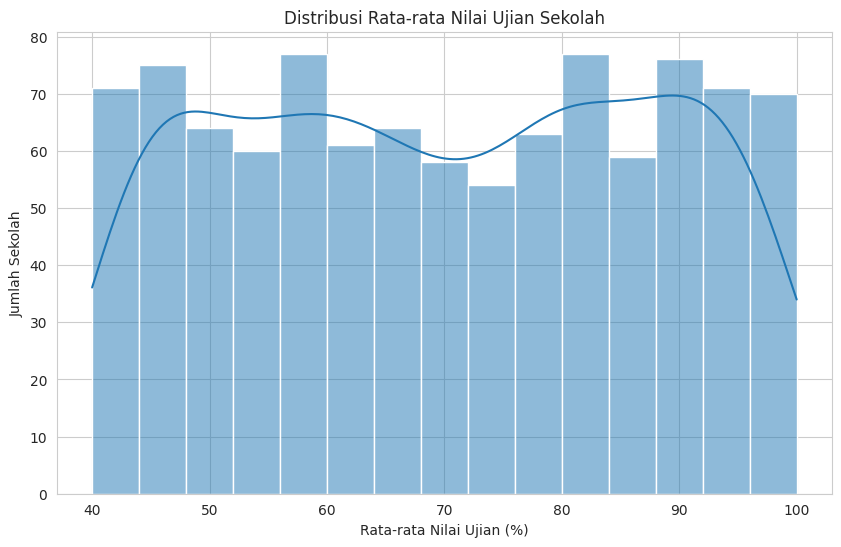

In [14]:
# Distribusi Nilai Ujian (Histogram)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(df['avg_test_score_percent'], bins=15, kde=True)

plt.title('Distribusi Rata-rata Nilai Ujian Sekolah')
plt.xlabel('Rata-rata Nilai Ujian (%)')
plt.ylabel('Jumlah Sekolah')

plt.show

In [17]:
# Perbandingan Akses Internet Antar Negara Bagian

rata_rata_akses_internet = df.groupby('state')['internet_access_percent'].mean().sort_values(ascending=False)

# Menampilkan 10 negara bagian dengan rata-rata akses internet tertinggi
print("10 Negara Bagian dengan Akses Internet Tertinggi:")
print(rata_rata_akses_internet.head(10))

10 Negara Bagian dengan Akses Internet Tertinggi:
state
California        78.817526
Illinois          75.955882
Michigan          75.753933
Pennsylvania      74.907143
Georgia           74.704673
North Carolina    74.000000
New York          73.780000
Florida           73.631818
Ohio              73.335644
Texas             72.676471
Name: internet_access_percent, dtype: float64


In [19]:
# Cari nilai ujian tertinggi
nilai_ujian_tertinggi = df['avg_test_score_percent'].max()

sekolah_tertinggi = df.loc[df['avg_test_score_percent'].idxmax()]

print(f"Nilai ujian tertinggi adalah: {nilai_ujian_tertinggi:.2f}%")
print(f'Sekolah dengan nilai tertinggi: {sekolah_tertinggi['school_name']} di {sekolah_tertinggi['state']}')

Nilai ujian tertinggi adalah: 100.00%
Sekolah dengan nilai tertinggi: Smith High School di California


In [24]:
# Pendanaan per Siswa Terbanyak dan Paling Sedikit
pendanaan_tertinggi = df['funding_per_student_usd'].max()

sekolah_pendanaan_tertinggi = df.loc[df['funding_per_student_usd'].idxmax()]

print(f"Pendanaan per siswa tertinggi: ${pendanaan_tertinggi:,.2f}")
print(f"Sekolah dengan pendanaan tertinggi: {sekolah_pendanaan_tertinggi['school_name']} di {sekolah_pendanaan_tertinggi['state']}")

Pendanaan per siswa tertinggi: $24,981.90
Sekolah dengan pendanaan tertinggi: Hart Middle School di Georgia


In [25]:
#rata-rata seluruh data

rata_rata_semua = df[[
    'avg_test_score_percent',
    'funding_per_student_usd',
    'dropout_rate_percent'
]].mean()


print("Rata-rata metrik utama di seluruh sekolah:")
print(rata_rata_semua)

Rata-rata metrik utama di seluruh sekolah:
avg_test_score_percent        70.00100
funding_per_student_usd    15154.16018
dropout_rate_percent           7.76560
dtype: float64


In [32]:
# Sekolah Paling Umum Berdasarkan Tingkat Pendidikan
tingkat_pendidikan_terumum = df['grade_level'].mode()

print(f"Tingkat pendidikan paling umum adalah: {tingkat_pendidikan_terumum.iloc[0]}")

Tingkat pendidikan paling umum adalah: Elementary


In [33]:
# Median Pendanaan per Siswa
median_pendanaan = df['funding_per_student_usd'].median()
print (f"Median pendanaan per siswa adalah: ${median_pendanaan:,.2f}")

Median pendanaan per siswa adalah: $15,362.47


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   school_name              1000 non-null   object 
 2   state                    1000 non-null   object 
 3   school_type              1000 non-null   object 
 4   grade_level              1000 non-null   object 
 5   funding_per_student_usd  1000 non-null   float64
 6   avg_test_score_percent   1000 non-null   float64
 7   student_teacher_ratio    1000 non-null   float64
 8   percent_low_income       1000 non-null   float64
 9   percent_minority         1000 non-null   float64
 10  internet_access_percent  1000 non-null   float64
 11  dropout_rate_percent     1000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 93.9+ KB


In [38]:
# Jumlah sekolah per negara bagian
jumlah_sekolah_per_state = df['state'].value_counts()

print(f"Jumlah sekolah per negara bagian:")
print(jumlah_sekolah_per_state)

Jumlah sekolah per negara bagian:
state
Texas             119
Florida           110
Georgia           107
Illinois          102
Ohio              101
California         97
North Carolina     96
New York           95
Michigan           89
Pennsylvania       84
Name: count, dtype: int64


In [39]:
# Perbandingan Nilai Ujian antara Sekolah Swasta dan Negeri
sekolah_swasta = df[df['school_type'] == 'Private']
sekolah_negeri = df[df['school_type'] == 'Public']

rata_rata_nilai_swasta = sekolah_swasta['avg_test_score_percent'].mean()
rata_rata_nilai_negeri = sekolah_negeri['avg_test_score_percent'].mean()

print(f"Rata-rata nilai ujian sekolah swasta: {rata_rata_nilai_swasta:.2f}%")
print(f"Rata-rata nilai ujian sekolah negeri: {rata_rata_nilai_negeri:.2f}%")

Rata-rata nilai ujian sekolah swasta: 70.51%
Rata-rata nilai ujian sekolah negeri: 70.39%


In [40]:
#Proporsi Siswa Minoritas Terendah
indeks_terendah = df['percent_minority'].idxmin()

sekolah_terendah = df.loc[indeks_terendah]

print("Sekolah dengan persentase siswa minoritas terendah:")
print(f"Nama Sekolah: {sekolah_terendah['school_name']}")
print(f"Persentase Siswa Minoritas: {sekolah_terendah['percent_minority']:.2f}%")
print(f"Negara Bagian: {sekolah_terendah['state']}")

Sekolah dengan persentase siswa minoritas terendah:
Nama Sekolah: Jones Middle School
Persentase Siswa Minoritas: 5.00%
Negara Bagian: New York
